In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient

In [3]:
# Data Collection
client = MongoClient('mongodb://localhost:27017/')
db = client['income_spending']
collection = db['user_data']
data = pd.DataFrame(list(collection.find()))

In [4]:
# Data Processing
# Calculate total spending
data['total_spent'] = data[['utilities', 'entertainment', 'school_fees', 'shopping', 'healthcare']].sum(axis=1)

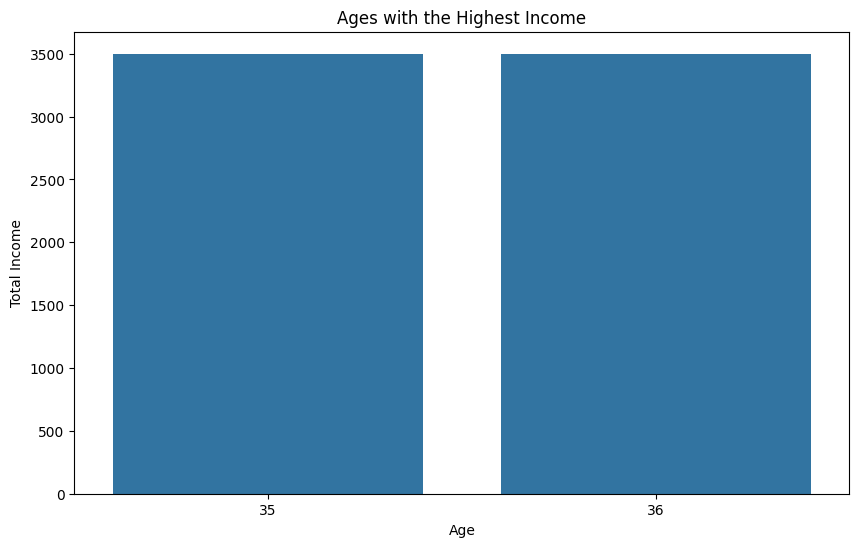

In [15]:

# Visualizations

# 1. Show the ages with the highest income
plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='total_income', data=data)
plt.title('Ages with the Highest Income')
plt.xlabel('Age')
plt.ylabel('Total Income')
plt.savefig('highest_income_ages.png')  # Save the chart
plt.show()

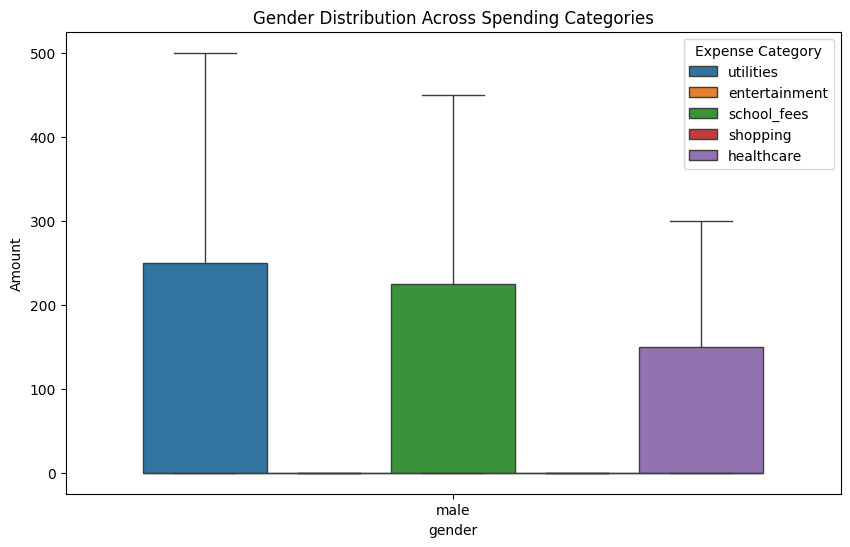

In [16]:

# Plot 2: Gender distribution across spending categories
expense_cols = ['utilities', 'entertainment', 'school_fees', 'shopping', 'healthcare']
data_long = data.melt(id_vars=['gender'], value_vars=expense_cols, var_name='Expense Category', value_name='Amount')

plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='Amount', hue='Expense Category', data=data_long)
plt.title('Gender Distribution Across Spending Categories')
# Export charts
plt.savefig('gender_spending_distribution.png')
plt.show()